In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('C:/AOOP_TP1/1000000-bandcamp-sales.csv')

df = pd.DataFrame(dataset)

# Columns having missing values
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]

# Função para converter colunas não numéricas em numéricas usando Label Encoding
def label_encode_columns(df):
    # Lista de colunas não numéricas
    non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # Loop sobre cada coluna não numérica e aplicar Label Encoding
    for col in non_numeric_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
    
    return df

# Aplicar a função para converter colunas não numéricas em numéricas
df = label_encode_columns(df)


import pandas as pd

# Calcular a média de cada coluna
column_means = df.mean()

# Substituir os valores ausentes pela média da coluna
df = df.fillna(column_means)

# Filter the DataFrame to exclude values above 15000 for amount_paid and 10000 for item_price
df = df[(df['amount_paid'] <= 15000) & (df['item_price'] <= 10000)]

df

,_id,art_url,item_type,utc_date,country_code,track_album_slug_text,country,slug_type,amount_paid_fmt,item_price,...,amount_paid,releases,artist_name,currency,album_title,amount_paid_usd,package_image_id,amount_over_fmt,item_slug,addl_count
0,0,76942,0,1.599689e+09,58,482,174,0,3024,9.990000,...,9.99,31.063536,51422,17,101606,9.99,1.977005e+07,1555,156,1.462147
1,1,252317,0,1.599689e+09,53,482,53,0,3913,1.000000,...,1.00,31.063536,65090,6,101606,1.30,1.977005e+07,1555,156,1.462147
2,2,273479,0,1.599689e+09,53,482,53,0,4547,3.000000,...,3.00,31.063536,28773,6,101606,3.90,1.977005e+07,1555,156,1.462147
3,3,39140,2,1.599689e+09,58,482,174,0,5761,10.500000,...,10.50,31.063536,143200,5,95228,12.39,2.047634e+07,1555,156,1.462147
4,4,280311,3,1.599689e+09,172,482,175,3,62,1.000000,...,1.00,31.063536,73280,17,101606,1.00,1.977005e+07,1555,156,1.462147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,63235,2,1.601647e+09,30,482,31,0,1168,20.000000,...,20.00,31.063536,43245,17,66882,20.00,2.183946e+07,1555,156,1.462147
999996,999996,298026,0,1.601647e+09,172,482,175,0,1187,20.200001,...,20.20,31.063536,141170,17,101606,20.20,1.977005e+07,1555,156,1.462147
999997,999997,86581,0,1.601647e+09,10,482,9,0,62,0.000000,...,1.00,31.063536,157677,17,101606,1.00,1.977005e+07,1555,156,1.462147
999998,999998,34899,2,1.601647e+09,172,482,175,2,2441,6.000000,...,6.00,31.063536,15240,17,101606,6.00,1.975948e+07,1555,156,1.462147


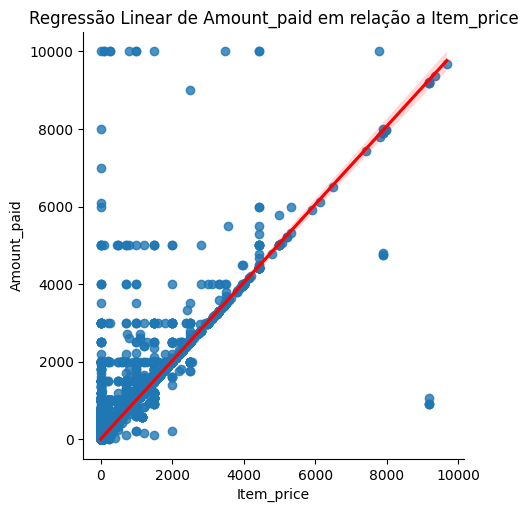

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the scatter plot with linear regression line and changing the line color to red
sns.lmplot(x='item_price', y='amount_paid', data=df, line_kws={'color': 'red'})

# Adding title and axis labels
plt.title('Regressão Linear de Amount_paid em relação a Item_price')
plt.xlabel('Item_price')
plt.ylabel('Amount_paid')

# Displaying the plot
plt.show()

c:\Users\alexp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


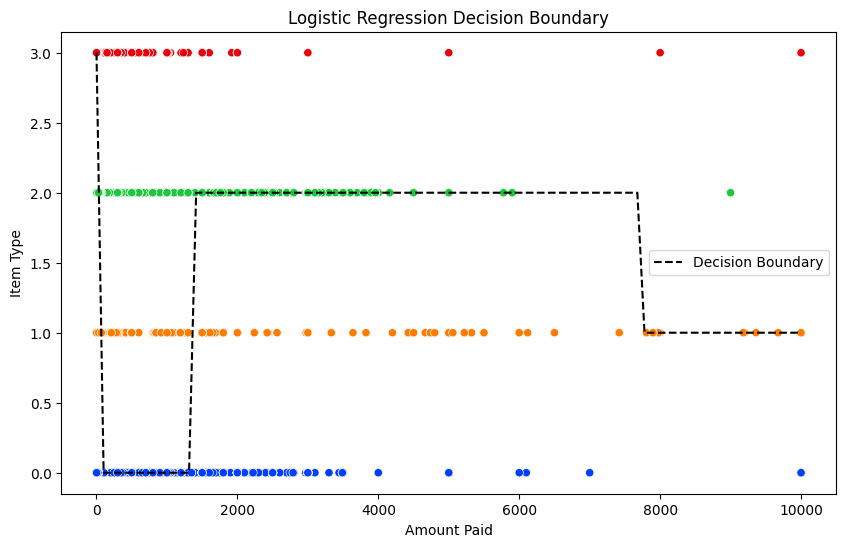

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Define features (X) and target variable (y)
X = df[['amount_paid']]
y = df['item_type'] 

# Create and fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount_paid', y='item_type', data=df, hue='item_type', palette='bright', legend=False)

# Plot decision boundary
x_values = np.linspace(df['amount_paid'].min(), df['amount_paid'].max(), 100)
y_values = model.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, color='black', linestyle='--', label='Decision Boundary')

# Add labels and legend
plt.xlabel('Amount Paid')
plt.ylabel('Item Type')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

# Show plot
plt.show()

IndexError: list index out of range

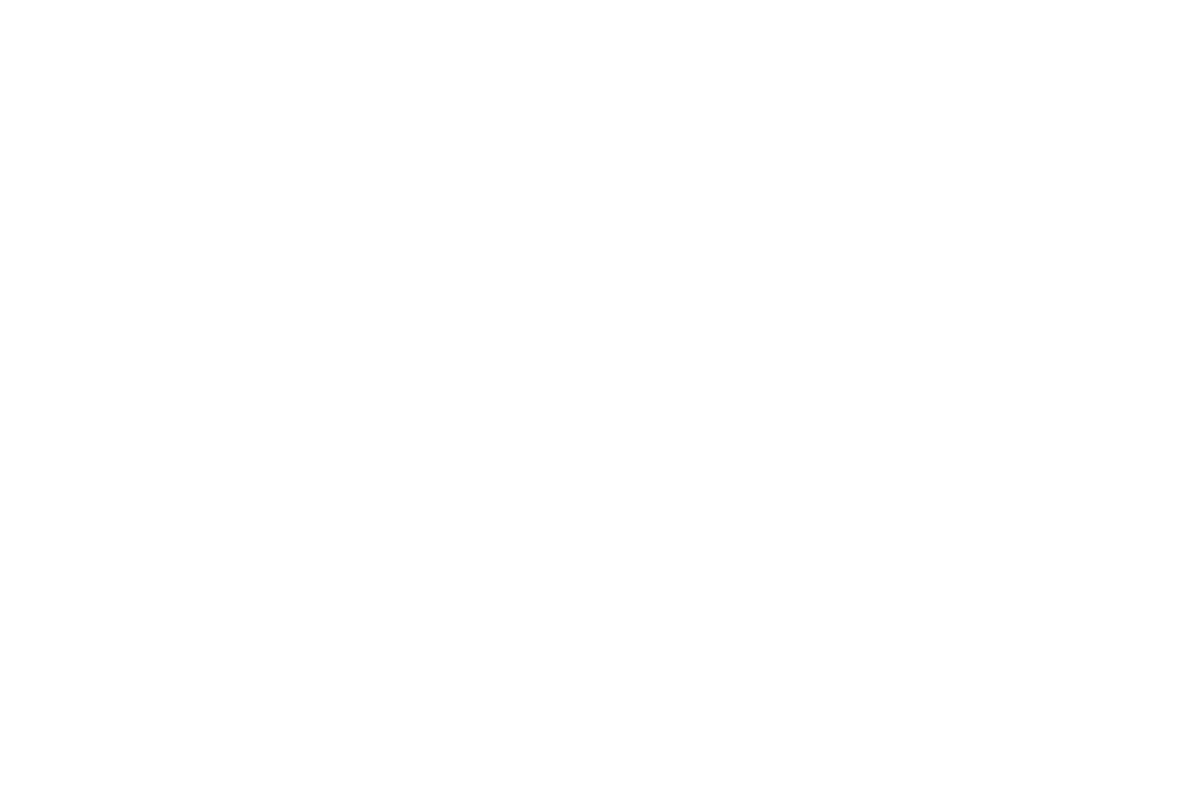

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Selecionar as variáveis relevantes
features = ['amount_paid', 'item_type']

# Subconjunto do DataFrame com apenas as variáveis selecionadas
data = df[features].copy()

# Criar e ajustar o modelo da árvore de decisão
model = DecisionTreeClassifier()
model.fit(data.drop(columns=['item_type']), data['item_type'])

# Plote a árvore de decisão
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=features[:-1], class_names=['Digital Album', 'Physical Item', 'Digital Track'])
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Selecionar as variáveis relevantes
features = ['amount_paid', 'item_type']

# Subconjunto do DataFrame com apenas as variáveis selecionadas
data = df[features].copy()

# Remover linhas com valores NaN, se houver
data.dropna(inplace=True)

# Criar e ajustar o modelo Random Forest
model = RandomForestClassifier()
model.fit(data.drop(columns=['item_type']), data['item_type'])

# Exibir a importância das características
importances = model.feature_importances_
indices = range(len(features))

plt.figure(figsize=(8, 4))
plt.barh(indices, importances, align='center')
plt.yticks(indices, features[:-1])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecionar as variáveis relevantes
features = ['amount_paid']
target = 'item_type'

# Subconjunto do DataFrame com apenas as variáveis selecionadas
data = df[features + [target]].copy()

# Remover linhas com valores NaN, se houver
data.dropna(inplace=True)

# Dividir os dados em conjunto de treinamento e teste
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados de entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar o modelo de RNA
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Saída com 3 classes para item_type
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)

print('\nTest accuracy:', test_acc)
